<a href="https://colab.research.google.com/github/Dvados/NM/blob/main/%D0%9B%D1%806.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №6 студента групи АнД-31 Тищенко Владислава

In [15]:
import zipfile
import pathlib
import numpy as np

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip 
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

data_dir = pathlib.Path("101_food_classes_10_percent/train/") # turn our training path into a Python path
all_class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
n = 10
my_class_names = [all_class_names[n-1], all_class_names[n+29], all_class_names[n+59]]
print(my_class_names)

--2022-06-05 13:25:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.0.48, 142.250.73.208, 142.250.188.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.0.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.3’

101_food_classes_10 100%[===================>]   1.51G   103MB/s    in 13s     

2022-06-05 13:25:37 (120 MB/s) - ‘101_food_classes_10_percent.zip.3’ saved [1625420029/1625420029]

['breakfast_burrito', 'foie_gras', 'oysters']


In [20]:
from pathlib import Path
import shutil

for path in all_class_names:
  if path != my_class_names[0] and path != my_class_names[1] and path != my_class_names[2]:
    dirpath = Path('101_food_classes_10_percent/train') / path
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)
    dirpath = Path('101_food_classes_10_percent/test') / path
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)

In [21]:
import os
for dirpath, dirnames, filenames in os.walk("101_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 3 directories and 0 images in '101_food_classes_10_percent/train'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/foie_gras'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/breakfast_burrito'.
There are 0 directories and 75 images in '101_food_classes_10_percent/train/oysters'.
There are 3 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/foie_gras'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/breakfast_burrito'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/oysters'.


In [22]:
# Define training and test directory paths
train_dir = "101_food_classes_10_percent/test/"
test_dir = "101_food_classes_10_percent/train/"

Image shape: (512, 512, 3)


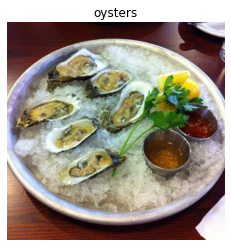

In [23]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(my_class_names))

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [26]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 750 images belonging to 3 classes.


In [27]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

m_1 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

m_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

tb_callback_1 = tf.keras.callbacks.TensorBoard(log_dir='logs/cnn', histogram_freq=1)

h_1 = m_1.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[tb_callback_1])

Epoch 1/10
24/24 [==============================] - 56s 2s/step - loss: 1.8493 - accuracy: 0.3440 - val_loss: 1.0757 - val_accuracy: 0.3911
Epoch 2/10
24/24 [==============================] - 49s 2s/step - loss: 1.0505 - accuracy: 0.3560 - val_loss: 1.0328 - val_accuracy: 0.3867
Epoch 3/10
24/24 [==============================] - 51s 2s/step - loss: 0.9936 - accuracy: 0.5173 - val_loss: 0.9416 - val_accuracy: 0.5867
Epoch 4/10
24/24 [==============================] - 58s 2s/step - loss: 0.9327 - accuracy: 0.5653 - val_loss: 0.9470 - val_accuracy: 0.5422
Epoch 5/10
24/24 [==============================] - 48s 2s/step - loss: 0.8979 - accuracy: 0.5800 - val_loss: 0.9888 - val_accuracy: 0.5556
Epoch 6/10
24/24 [==============================] - 50s 2s/step - loss: 0.9115 - accuracy: 0.5787 - val_loss: 0.8246 - val_accuracy: 0.6578
Epoch 7/10
24/24 [==============================] - 49s 2s/step - loss: 0.8264 - accuracy: 0.6440 - val_loss: 0.9117 - val_accuracy: 0.6089
Epoch 8/10
24/24 [==

In [29]:
import tensorflow as tf
import tensorflow_hub as hub


m_2 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5",
                   trainable=False),
    tf.keras.layers.Dense(3, activation='softmax')
])
m_2.build([None, 224, 224, 3])

tb_callback_2 = tf.keras.callbacks.TensorBoard(log_dir='logs/resnet(adam)notunnig', histogram_freq=1)

m_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

h_2 = m_2.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[tb_callback_2])

Epoch 1/10
24/24 [==============================] - 283s 12s/step - loss: 0.8004 - accuracy: 0.6707 - val_loss: 0.4144 - val_accuracy: 0.8267
Epoch 2/10
24/24 [==============================] - 243s 10s/step - loss: 0.3006 - accuracy: 0.8907 - val_loss: 0.3004 - val_accuracy: 0.8800
Epoch 3/10
24/24 [==============================] - 277s 12s/step - loss: 0.2289 - accuracy: 0.9173 - val_loss: 0.2784 - val_accuracy: 0.8800
Epoch 4/10
24/24 [==============================] - 273s 12s/step - loss: 0.2277 - accuracy: 0.9200 - val_loss: 0.2828 - val_accuracy: 0.8889
Epoch 5/10
24/24 [==============================] - 272s 11s/step - loss: 0.2315 - accuracy: 0.9107 - val_loss: 0.2755 - val_accuracy: 0.8889
Epoch 6/10
24/24 [==============================] - 244s 10s/step - loss: 0.1607 - accuracy: 0.9413 - val_loss: 0.2304 - val_accuracy: 0.9111
Epoch 7/10
24/24 [==============================] - 273s 12s/step - loss: 0.1480 - accuracy: 0.9413 - val_loss: 0.2173 - val_accuracy: 0.9200
Epoch 

In [30]:
m_3 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/5",
                   trainable=False),
    tf.keras.layers.Dense(3, activation='softmax')
])
m_3.build([None, 224, 224, 3])

tb_callback_3 = tf.keras.callbacks.TensorBoard(log_dir='logs/resnet(sgd)notunnig', histogram_freq=1)

m_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

h_3 = m_3.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[tb_callback_3])

Epoch 1/10
24/24 [==============================] - 251s 10s/step - loss: 0.7376 - accuracy: 0.7320 - val_loss: 0.3830 - val_accuracy: 0.8489
Epoch 2/10
24/24 [==============================] - 243s 10s/step - loss: 0.3050 - accuracy: 0.8840 - val_loss: 0.3157 - val_accuracy: 0.8800
Epoch 3/10
24/24 [==============================] - 272s 11s/step - loss: 0.2680 - accuracy: 0.9067 - val_loss: 0.2991 - val_accuracy: 0.8889
Epoch 4/10
24/24 [==============================] - 243s 10s/step - loss: 0.2040 - accuracy: 0.9213 - val_loss: 0.2903 - val_accuracy: 0.8933
Epoch 5/10
24/24 [==============================] - 243s 10s/step - loss: 0.1814 - accuracy: 0.9253 - val_loss: 0.2646 - val_accuracy: 0.9067
Epoch 6/10
24/24 [==============================] - 270s 11s/step - loss: 0.1924 - accuracy: 0.9227 - val_loss: 0.2269 - val_accuracy: 0.9200
Epoch 7/10
24/24 [==============================] - 273s 12s/step - loss: 0.1606 - accuracy: 0.9520 - val_loss: 0.2318 - val_accuracy: 0.9289
Epoch 

In [31]:
m_4 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
                   trainable=False),
    tf.keras.layers.Dense(3, activation='softmax')
])
m_4.build([None, 224, 224, 3])

tb_callback_4 = tf.keras.callbacks.TensorBoard(log_dir='logs/effnet(adam)notunning', histogram_freq=1)

m_4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

h_4 = m_4.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks = [tb_callback_4])

Epoch 1/10
24/24 [==============================] - 65s 2s/step - loss: 0.7143 - accuracy: 0.7373 - val_loss: 0.4094 - val_accuracy: 0.8800
Epoch 2/10
24/24 [==============================] - 53s 2s/step - loss: 0.3152 - accuracy: 0.9253 - val_loss: 0.2838 - val_accuracy: 0.9156
Epoch 3/10
24/24 [==============================] - 52s 2s/step - loss: 0.2284 - accuracy: 0.9453 - val_loss: 0.2508 - val_accuracy: 0.9200
Epoch 4/10
24/24 [==============================] - 52s 2s/step - loss: 0.1784 - accuracy: 0.9613 - val_loss: 0.2177 - val_accuracy: 0.9244
Epoch 5/10
24/24 [==============================] - 52s 2s/step - loss: 0.1629 - accuracy: 0.9547 - val_loss: 0.1970 - val_accuracy: 0.9378
Epoch 6/10
24/24 [==============================] - 52s 2s/step - loss: 0.1413 - accuracy: 0.9640 - val_loss: 0.1868 - val_accuracy: 0.9378
Epoch 7/10
24/24 [==============================] - 52s 2s/step - loss: 0.1267 - accuracy: 0.9747 - val_loss: 0.1792 - val_accuracy: 0.9378
Epoch 8/10
24/24 [==

In [32]:
m_5 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
                   trainable=False),
    tf.keras.layers.Dense(3, activation='softmax')
])
m_5.build([None, 224, 224, 3])

tb_callback_5 = tf.keras.callbacks.TensorBoard(log_dir='logs/effnet(sgd)notunning', histogram_freq=1)

m_5.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

h_5 = m_5.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks = [tb_callback_5])

Epoch 1/10
24/24 [==============================] - 82s 3s/step - loss: 0.9194 - accuracy: 0.5920 - val_loss: 0.6605 - val_accuracy: 0.8444
Epoch 2/10
24/24 [==============================] - 58s 2s/step - loss: 0.5364 - accuracy: 0.9093 - val_loss: 0.4733 - val_accuracy: 0.8978
Epoch 3/10
24/24 [==============================] - 58s 2s/step - loss: 0.4178 - accuracy: 0.9107 - val_loss: 0.3914 - val_accuracy: 0.9156
Epoch 4/10
24/24 [==============================] - 67s 3s/step - loss: 0.3477 - accuracy: 0.9373 - val_loss: 0.3439 - val_accuracy: 0.9200
Epoch 5/10
24/24 [==============================] - 58s 2s/step - loss: 0.3036 - accuracy: 0.9320 - val_loss: 0.3162 - val_accuracy: 0.9200
Epoch 6/10
24/24 [==============================] - 67s 3s/step - loss: 0.2759 - accuracy: 0.9400 - val_loss: 0.2960 - val_accuracy: 0.9244
Epoch 7/10
24/24 [==============================] - 66s 3s/step - loss: 0.2574 - accuracy: 0.9373 - val_loss: 0.2811 - val_accuracy: 0.9200
Epoch 8/10
24/24 [==

In [33]:
import tensorflow as tf
efficientnet_model = tf.keras.applications.efficientnet.EfficientNetB0(classes=3, weights=None)
for layer in efficientnet_model.layers:
  layer.trainable = False;

for layer in efficientnet_model.layers[-10:]:
  layer.trainable = True;

tb_callback_6 = tf.keras.callbacks.TensorBoard(log_dir='logs/effnet(sgd)tunnig', histogram_freq=1)

efficientnet_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

h_6 = efficientnet_model.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[tb_callback_6])

Epoch 1/10
24/24 [==============================] - 79s 3s/step - loss: 1.1013 - accuracy: 0.3000 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/10
24/24 [==============================] - 71s 3s/step - loss: 1.1024 - accuracy: 0.2867 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/10
24/24 [==============================] - 71s 3s/step - loss: 1.0996 - accuracy: 0.3360 - val_loss: 1.1030 - val_accuracy: 0.3333
Epoch 4/10
24/24 [==============================] - 61s 3s/step - loss: 1.1029 - accuracy: 0.3107 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 5/10
24/24 [==============================] - 71s 3s/step - loss: 1.1026 - accuracy: 0.3040 - val_loss: 1.0997 - val_accuracy: 0.3333
Epoch 6/10
24/24 [==============================] - 73s 3s/step - loss: 1.1012 - accuracy: 0.3240 - val_loss: 1.1005 - val_accuracy: 0.3333
Epoch 7/10
24/24 [==============================] - 63s 3s/step - loss: 1.1021 - accuracy: 0.3227 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 8/10
24/24 [==

In [34]:
resnet_model = tf.keras.applications.resnet.ResNet101(classes=3, weights=None)
for layer in resnet_model.layers:
  layer.trainable = False;

for layer in resnet_model.layers[-10:]:
  layer.trainable = True;

tb_callback_7 = tf.keras.callbacks.TensorBoard(log_dir='logs/resnet(sgd)tunnig', histogram_freq=1)

resnet_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

h_7 = resnet_model.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[tb_callback_7])

Epoch 1/10
24/24 [==============================] - 317s 13s/step - loss: 1.1430 - accuracy: 0.3773 - val_loss: 1.0971 - val_accuracy: 0.3378
Epoch 2/10
24/24 [==============================] - 305s 13s/step - loss: 1.0384 - accuracy: 0.4680 - val_loss: 1.0969 - val_accuracy: 0.3333
Epoch 3/10
24/24 [==============================] - 307s 13s/step - loss: 1.0341 - accuracy: 0.4733 - val_loss: 1.0977 - val_accuracy: 0.3467
Epoch 4/10
24/24 [==============================] - 306s 13s/step - loss: 1.0516 - accuracy: 0.4507 - val_loss: 1.1323 - val_accuracy: 0.3333
Epoch 5/10
24/24 [==============================] - 307s 13s/step - loss: 1.0053 - accuracy: 0.5027 - val_loss: 1.1365 - val_accuracy: 0.3333
Epoch 6/10
24/24 [==============================] - 305s 13s/step - loss: 0.9549 - accuracy: 0.5413 - val_loss: 1.1472 - val_accuracy: 0.3333
Epoch 7/10
24/24 [==============================] - 306s 13s/step - loss: 0.9696 - accuracy: 0.5093 - val_loss: 1.0977 - val_accuracy: 0.4044
Epoch 

In [35]:
%tensorboard --logdir logs/

<IPython.core.display.Javascript object>